# 第5章 （1）バギング

集団学習（アンサンブル学習）とは，複数の機械学習を組み合わせることで，結果として優れたモデルを作成する手法のことである．集団学習の中でも簡単なバギング(Bagging)の説明から行う．

## ノーフリーランチ定理

まず，なぜ複数の機械学習を組み合わせるのだろうか．それは，これまでに数多くの機械学習アルゴリズムが提案されてきたが，どのような問題にも対しても1番性能が良い機械学習アルゴリズムが存在しないことが証明されているからである．それをノーフリーランチ定理という．ここでは，数式を用いた証明は省略し，簡単に説明したいと思う．

ノーフリーランチ定理とは，「すべての識別問題に対して，他の識別器より識別性能が良い識別器は存在しない．」というものである．これを別の表現で言うと「「あるアルゴリズム A がある予測問題で，アルゴリズム B より汎化誤差に関して性能が良かったとしても，アルゴリズム B が A より良くなるような別の予測問題が存在する」となる．

図で示す．

<img src="work/NoFreeLunch.gif" width="600">

つまり，この定理によれば，ある識別器が他よりも汎化性能が良いといえるのは特定の認識問題についてのみである．対象とする問題領域を規定しなければ，汎化性能はすべて同じになる．

そこで，様々な識別器を用意し，それらを組み合わせることで，汎化性能を向上させようとする手法が集団学習である．

第5章では，集団学習の代表的な手法であるバギング，ブースティング（AdaBoost），ランダムフォレストについて説明を行う．

## バイアス-バリアンスのトレードオフ

「統計学と機械学習において，パラメータの推定においてバイアス（偏り）を減らすと標本間のバリアンス（分散）が増え，同時にその逆も成立する．」という予測モデルの特徴のことである．

機械学習の目的は，「観測不能な真の値と予測値との誤差を可能な限り小さくする」ことである．
つまり，

損失の期待値＝バイアス＋バリアンス＋ノイズ

となる．機械学習では，「損失の期待値」が最小になるようにモデルを作成します．しかし，上の式の右辺の3番目「ノイズ」は制御できない．
したがって，バイアスとバリアンスをいかに小さくするかがポイントとなる．

### バイアスとは
訓練データのデータセット$(X, y)$を使ってXからyを予測する機械学習モデルf(X)を作ったとする．

バイアスとは，「訓練データの y」と「予測した値 f(X)」のズレのことである．

バイアスが大きいということは，データと予測値がかけ離れている，つまりモデルが実データをうまく再現できていないということです．
つまり，「学習不足だ！」「学習がいまいちだ」ということが言えます．

例えば，訓練データがsin波のような波状のグラフに沿って分布している場合，直線のモデルだとうまくフィットできない．そんな感じとなる．

### バリアンスとは
バリアンスとは，訓練データのデータセットを変えたら，訓練データのyと予測した値f(X)のズレが大きくなったり小さくなったりすることである．

言い換えると，モデルの汎用性のなさである．

例えば，ある機械学習モデルを作ったとします．10000個の訓練データを100個ずつに分けて，それぞれについてこのモデルを使って計算したとします。

この100回の実データ／予測データのズレを平均したものがバイアスに相当する．

この100回の実データ／予測データのズレのばらつきがバリアンスに相当する．

バリアンスが大きいということは，訓練データの一部にフィットしすぎて，他のものにフィットしなくなる状態を言います．

グラフが不自然に細かくグネグネしてるものは，たいていバリアンスが大きいモデルです．

逆にバリアンスが小さいということは，グラフが滑らかな傾向です．

### 結局のところ
バイアスは「真の値と予測値の平均の誤差」
バリアンスは「予測値のばらつき」である．

テストデータに対して汎化性能の高い機械を作りたいわけだが，これをバイアスとバリアンスの言葉を使うと，  
「バイアスが小さく，かつ，バリアンスも小さくしたい．」  
「しかし，バイアスとバリアンスはトレードオフになっている．」  
ということである．

## バギング (Bagging)

複数の識別器を組み合わせる手法の一つに，バギング (Bagging)がある．バギング (Bagging)とは，Bootstrap Aggregatingから派生した語句である．

その名前の通り，バギングは学習データのブートストラップサンプルを用いて複数の識別器を学習させ，新しい入力データのクラスはそれらの識別器の多数決で決めるという方法である．

個々の識別器の性能はランダム識別器よりも少し良ければいいので，弱学習器と呼ばれる．一般的に，機械学習のアルゴリズムは，バイアス-バリアンスのトレードオフがあるため，学習データに過学習をしないように適切にパラメータを調整する必要がある．バギングでは，ブートストラップサンプルによって，仮に過学習してしまった弱学習器があったとしても，多数決のときには排除されるため，全体としては安定した性能の識別器を構築することができる．

### 学習データのブートストラップサンプル

バギングでは，単一の学習データからランダムサンプリングによって，各弱学習器の学習データを作成する．このとき，元の学習データ$N$個から重複を許してランダムに$n_M$個抽出する．これをブートストラップサンプリングという．これを，弱学習器$M$個作成する．各ブートストラップサンプルは元の学習データには似ているが，少し違う学習データとなるため，それを学習する弱学習器も，それぞれ少し異なることになる．バギングの様子を以下の図に示す．

また，各弱学習器は並列に学習も可能である．

<img src="work/1.png" width="600">

実は，バギングのアルゴリズムは，単にブートストラップサンプリングするだけなので実装は簡単である．実際に決定木にバギングを適用して性能評価を行う．

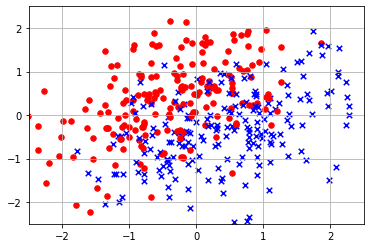

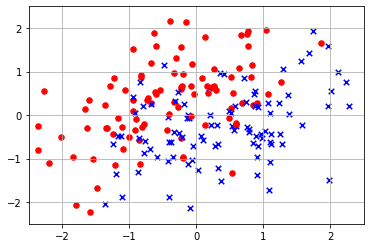

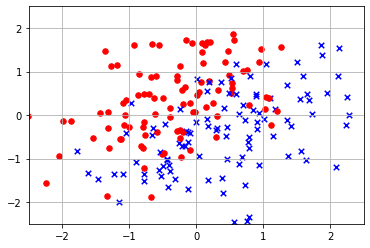

In [31]:
# 魚データ
# 特徴ベクトル：2次元（体長, 体重）
# ラベル数：2（サケ(A)とスズキ(B)）

# 確率密度関数で生成
# 分散共分散行列で楕円を指定
# ただし，データのオーバーラップを生じさせて，難しくする．
# トレーニングデータとテストデータを作成する．

import numpy as np
import pandas as pd

# 乱数の種を初期化
np.random.seed(0)

# データ数
numA = 200 # Aをサケ
numB = 200 # Bをスズキ
numAll = numA + numB

# 平均
muA = [-2,2]
muB = [2,-2]

# 共分散
cov = [[30,15],[15,30]]

# 入力信号を生成
xA, yA = np.random.multivariate_normal(muA, cov, numA).T
xB, yB = np.random.multivariate_normal(muB, cov, numB).T

# 教師信号を生成
clsA = [1 for i in range(numA)]
clsB = [0 for i in range(numB)]

# DataFrameに変換
dfA = pd.DataFrame(np.array([xA,yA,clsA]).T, columns=['cm','kg','cls'])
dfB = pd.DataFrame(np.array([xB,yB,clsB]).T, columns=['cm','kg','cls'])
dfAll = pd.concat([dfA,dfB],axis=0)
dfAll = dfAll.reset_index(drop=True)

import sklearn.preprocessing as skl
dfAll.cm = skl.scale(dfAll.cm) #正規化
dfAll.kg = skl.scale(dfAll.kg) #正規化

# データ全体からトレーニングデータとテストデータを作成する．
df_s = dfAll.sample(frac=1, random_state=0).reset_index(drop=True) # ランダムシャッフル
n = int(numAll *0.5)
df_train = df_s[0:n].copy().reset_index(drop=True)
df_test = df_s[n:numAll].copy().reset_index(drop=True)

import matplotlib.pyplot as plt


# 散布図をプロットする
fig1 = plt.figure(1)
fig2 = plt.figure(2)
fig3 = plt.figure(3)

# データ全体
plt.figure(1)
for i in range(len(df_s)):
    if df_s.cls[i]==1:
        plt.scatter(df_s.cm[i],df_s.kg[i], color='r',marker='o', s=30)
    else:
        plt.scatter(df_s.cm[i],df_s.kg[i], color='b',marker='x', s=30)
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.grid(True)

# トレーニングデータ
plt.figure(2)
for i in range(len(df_train)):
    if df_train.cls[i]==1:
        plt.scatter(df_train.cm[i],df_train.kg[i], color='r',marker='o', s=30)
    else:
        plt.scatter(df_train.cm[i],df_train.kg[i], color='b',marker='x', s=30)
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.grid(True)
        
# テストデータ
plt.figure(3)
for i in range(len(df_test)):
    if df_test.cls[i]==1:
        plt.scatter(df_test.cm[i],df_test.kg[i], color='r',marker='o', s=30)
    else:
        plt.scatter(df_test.cm[i],df_test.kg[i], color='b',marker='x', s=30)
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.grid(True)

plt.show()

正答率(train):1.000


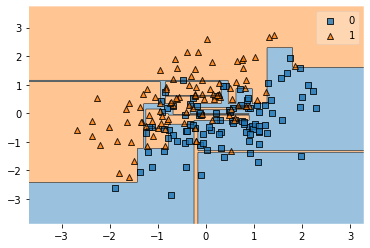

In [41]:
# 決定木

# 決定木に入力できるようにトレーニングデータとテストデータを変換
X_train = df_train[['cm','kg']].values
y_train = df_train[['cls']].values
y_train = y_train.reshape(len(y_train),) # ベクトルにする
y_train = np.array(y_train, dtype=np.int64)

X_test = df_test[['cm','kg']].values
y_test = df_test[['cls']].values
y_test = y_test.reshape(len(y_test),) # ベクトルにする
y_test = np.array(y_test, dtype=np.int64)


# 学習
from sklearn.tree import DecisionTreeClassifier

# モデルを作成
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)

# 表示
predicted = model.predict(X_train)

# 領域を表示
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train, model)

# 正答率
print('正答率(train):{:.3f}'.format(model.score(X_train,y_train)))

正答率(train):0.720


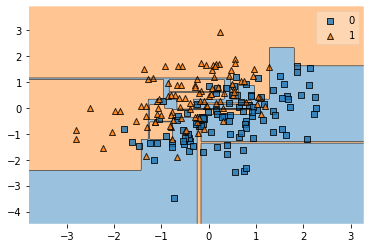

In [42]:
# 決定木

# 表示
predicted = model.predict(X_test)

# 領域を表示
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test, y_test, model)

# 正答率
print('正答率(train):{:.3f}'.format(model.score(X_test,y_test)))

## バギングの実装

In [43]:
# 魚データ
# 特徴ベクトル：2次元（体長, 体重）
# ラベル数：2（サケ(A)とスズキ(B)）

# 確率密度関数で生成
# 分散共分散行列で楕円を指定
# ただし，データのオーバーラップを生じさせて，難しくする．
# トレーニングデータとテストデータを作成する．

import numpy as np
import pandas as pd

# 乱数の種を初期化
np.random.seed(0)

# データ数
numA = 200 # Aをサケ
numB = 200 # Bをスズキ
numAll = numA + numB

# 平均
muA = [-2,2]
muB = [2,-2]

# 共分散
cov = [[30,15],[15,30]]

# 入力信号を生成
xA, yA = np.random.multivariate_normal(muA, cov, numA).T
xB, yB = np.random.multivariate_normal(muB, cov, numB).T

# 教師信号を生成
clsA = [1 for i in range(numA)]
clsB = [0 for i in range(numB)]

# DataFrameに変換
dfA = pd.DataFrame(np.array([xA,yA,clsA]).T, columns=['cm','kg','cls'])
dfB = pd.DataFrame(np.array([xB,yB,clsB]).T, columns=['cm','kg','cls'])
dfAll = pd.concat([dfA,dfB],axis=0)
dfAll = dfAll.reset_index(drop=True)

import sklearn.preprocessing as skl
dfAll.cm = skl.scale(dfAll.cm) #正規化
dfAll.kg = skl.scale(dfAll.kg) #正規化

from sklearn.model_selection import train_test_split
X = dfAll[['cm','kg']].values
y = dfAll[['cls']].values
y = y.reshape(len(y),) # ベクトルにする
y = np.array(y, dtype=np.int64)


X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

models = {
    'Tree': DecisionTreeClassifier(random_state=0),
    'Bagging': BaggingClassifier(DecisionTreeClassifier(random_state=0), n_estimators=100, random_state=0),
}

scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'train_score')] = model.score(X_train, y_train)
    scores[(model_name, 'test_score')] = model.score(X_test, y_test)

pd.Series(scores).unstack()

,test_score,train_score
Bagging,0.71,1.0
Tree,0.67,1.0


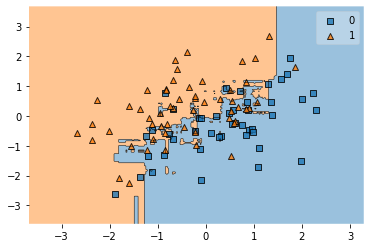

In [45]:
# 領域を表示
from mlxtend.plotting import plot_decision_regions
predicted = model.predict(X_test)
plot_decision_regions(X_test, y_test, model)

結果を比較すると，決定木よりもバギングの方が正答率が良くなっている．また，境界線が決定木よりもバギングの方がなめらかになっており，汎化性能が向上したことがわかる．